## Kaggle Machine Learning & Data Science Survey Ext

In [218]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [219]:
# Load the data
df = pd.read_csv('kaggle_2017_to_2020.csv', low_memory = False)

In [220]:
# Print the information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80327 entries, 0 to 80326
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unique_Id                           80327 non-null  int64 
 1   Time                                80327 non-null  object
 2   Year                                80327 non-null  int64 
 3   Age                                 80327 non-null  object
 4   Gender                              80327 non-null  object
 5   Country                             80327 non-null  object
 6   Degree                              80327 non-null  object
 7   Job Title                           80327 non-null  object
 8   Company Size                        80327 non-null  object
 9   Team Size                           80327 non-null  object
 10  ML Status in Company                80327 non-null  object
 11  Compensation Status                 80327 non-null  ob

In [221]:
df.head()

,Unique_Id,Time,Year,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Compensation Status,Money Spent,Current role experience (in years),Programming language choice,Recommend Programming language,Coding experience (in years),Specialised HW,TPU Usage,ML Methods experience (in years)
0,0,Unknown / Not Specified,2017,25.0,Male,Argentina,Master’s degree,Machine Learning Engineer,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,"Basic laptop (Macbook),Traditional Workstation",Unknown / Not Specified,Unknown / Not Specified
1,1,Unknown / Not Specified,2017,21.0,Prefer not to say,Argentina,No formal education past high school,Business Analyst,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
2,2,Unknown / Not Specified,2017,25.0,Male,Argentina,Bachelor’s degree,Computer Scientist,50-249 employees,Unknown / Not Specified,Unknown / Not Specified,"20,001-30,000",Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified
3,3,Unknown / Not Specified,2017,28.0,Male,Argentina,Bachelor’s degree,Other,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Python,Unknown / Not Specified,Other,Unknown / Not Specified,Unknown / Not Specified
4,4,Unknown / Not Specified,2017,38.0,Male,Argentina,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Cant Disclose,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified,Unknown / Not Specified


In [222]:
# Check for missing values
df.isnull().sum()

Unique_Id                             0
Time                                  0
Year                                  0
Age                                   0
Gender                                0
Country                               0
Degree                                0
Job Title                             0
Company Size                          0
Team Size                             0
ML Status in Company                  0
Compensation Status                   0
Money Spent                           0
Current role experience (in years)    0
Programming language choice           0
Recommend Programming language        0
Coding experience (in years)          0
Specialised HW                        0
TPU Usage                             0
ML Methods experience (in years)      0
dtype: int64

In [223]:
# Select the columns to drop
columns_to_drop = ['Unique_Id','Time','Specialised HW']

In [224]:
# Drop the columns
df.drop(columns = columns_to_drop, inplace =True )

In [225]:
# Find how many entries with unknown comensation are missing
df['Compensation Status'].describe()

count                       80327
unique                         19
top       Unknown / Not Specified
freq                        20201
Name: Compensation Status, dtype: object

In [226]:
df['Compensation Status'].unique()

array(['Cant Disclose', '20,001-30,000', '40,000-49,999', '> $500,000',
       '50,000-59,999', '10,001-20,000', '30,000-39,999',
       '300,000-500,000', '100,000-124,999', '200,000-249,999',
       '60,000-69,999', '80,000-89,999', '70,000-79,999',
       '125,000-149,999', '150,000-199,999', '250,000-299,999',
       '90,000-99,999', '0-10,000', 'Unknown / Not Specified'],
      dtype=object)

In [227]:
# Keep only entries with known compensations
filtered_df = df[df['Compensation Status'] != 'Unknown / Not Specified']
filtered_df = filtered_df[filtered_df['Compensation Status'] != 'Cant Disclose']

In [228]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43860 entries, 2 to 80325
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43860 non-null  int64 
 1   Age                                 43860 non-null  object
 2   Gender                              43860 non-null  object
 3   Country                             43860 non-null  object
 4   Degree                              43860 non-null  object
 5   Job Title                           43860 non-null  object
 6   Company Size                        43860 non-null  object
 7   Team Size                           43860 non-null  object
 8   ML Status in Company                43860 non-null  object
 9   Compensation Status                 43860 non-null  object
 10  Money Spent                         43860 non-null  object
 11  Current role experience (in years)  43860 non-null  ob

### About 40,000 entries were removed

In [229]:
# Check the type of education present in the survey
filtered_df['Degree'].unique()

array(['Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'Master’s degree', 'Professional degree', 'Doctoral degree',
       'Unknown / Not Specified', 'No formal education past high school',
       'I prefer not to answer'], dtype=object)

In [230]:
# Remove the unknown values from education column
filtered_df = filtered_df[filtered_df['Degree'] != 'Unknown / Not Specified']

In [231]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43854 entries, 2 to 80325
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                43854 non-null  int64 
 1   Age                                 43854 non-null  object
 2   Gender                              43854 non-null  object
 3   Country                             43854 non-null  object
 4   Degree                              43854 non-null  object
 5   Job Title                           43854 non-null  object
 6   Company Size                        43854 non-null  object
 7   Team Size                           43854 non-null  object
 8   ML Status in Company                43854 non-null  object
 9   Compensation Status                 43854 non-null  object
 10  Money Spent                         43854 non-null  object
 11  Current role experience (in years)  43854 non-null  ob

### About 2000 entries were removed

In [232]:
# Change the age column format to remove ranges and find the average
def parse_age(age):
    if '-' in age:
        low, high = age.replace(',', '').split('-')
    elif '>' in age:
        # Extract the numeric part after '>'
        low = age.replace(',', '').strip()
    else:
        # Handle other cases if needed
        low = high = age

    return pd.Series([low, high], index=['Low Age', 'High Age'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Age', 'High Age']] = filtered_df['Age'].apply(parse_age)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Age'] = pd.to_numeric(filtered_df['Low Age'], errors='coerce')
filtered_df['High Age'] = pd.to_numeric(filtered_df['High Age'], errors='coerce')

In [233]:
# Calculate the average of low and high range age
filtered_df['Average Age'] = (filtered_df['Low Age'] +  filtered_df['High Age']) / 2

In [234]:
# Drop the other age related column and keep average only
filtered_df = filtered_df.drop(columns = ['Age', 'Low Age', 'High Age'])

In [235]:
# Parse the compensation column to split between low and high range salaries
def parse_compensation(comp_range):
    if '-' in comp_range:
        low, high = comp_range.replace('$', '').replace(',', '').split('-')
    elif '>' in comp_range:
        # Extract the numeric part after '>'
        low = comp_range.replace('>', '').replace('$', '').replace(',', '').strip()
        high = None  # Set high range to None or you can use np.nan
    else:
        # Handle other cases if needed
        low = high = None

    return pd.Series([low, high], index=['Low Range Comp', 'High Range Comp'])

# Apply the function to the 'Compensation Status' column
filtered_df[['Low Range Comp', 'High Range Comp']] = filtered_df['Compensation Status'].apply(parse_compensation)

# Convert 'Low Range' and 'High Range' to numeric types (floats or ints)
filtered_df['Low Range Comp'] = pd.to_numeric(filtered_df['Low Range Comp'], errors='coerce')
filtered_df['High Range Comp'] = pd.to_numeric(filtered_df['High Range Comp'], errors='coerce')

In [236]:
filtered_df['Average Comp'] = (filtered_df['Low Range Comp'] +  filtered_df['High Range Comp']) / 2

In [237]:
filtered_df = filtered_df.drop(columns = 'Compensation Status')

## EDA

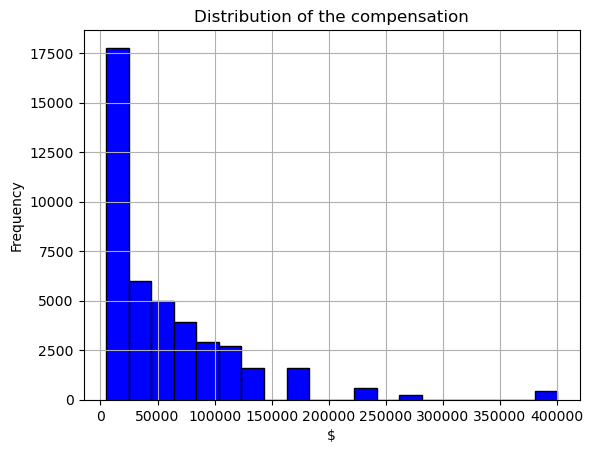

In [238]:
plt.hist(filtered_df["Average Comp"], bins=20, edgecolor='black', color='blue')
plt.title('Distribution of the compensation')
plt.xlabel('$')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

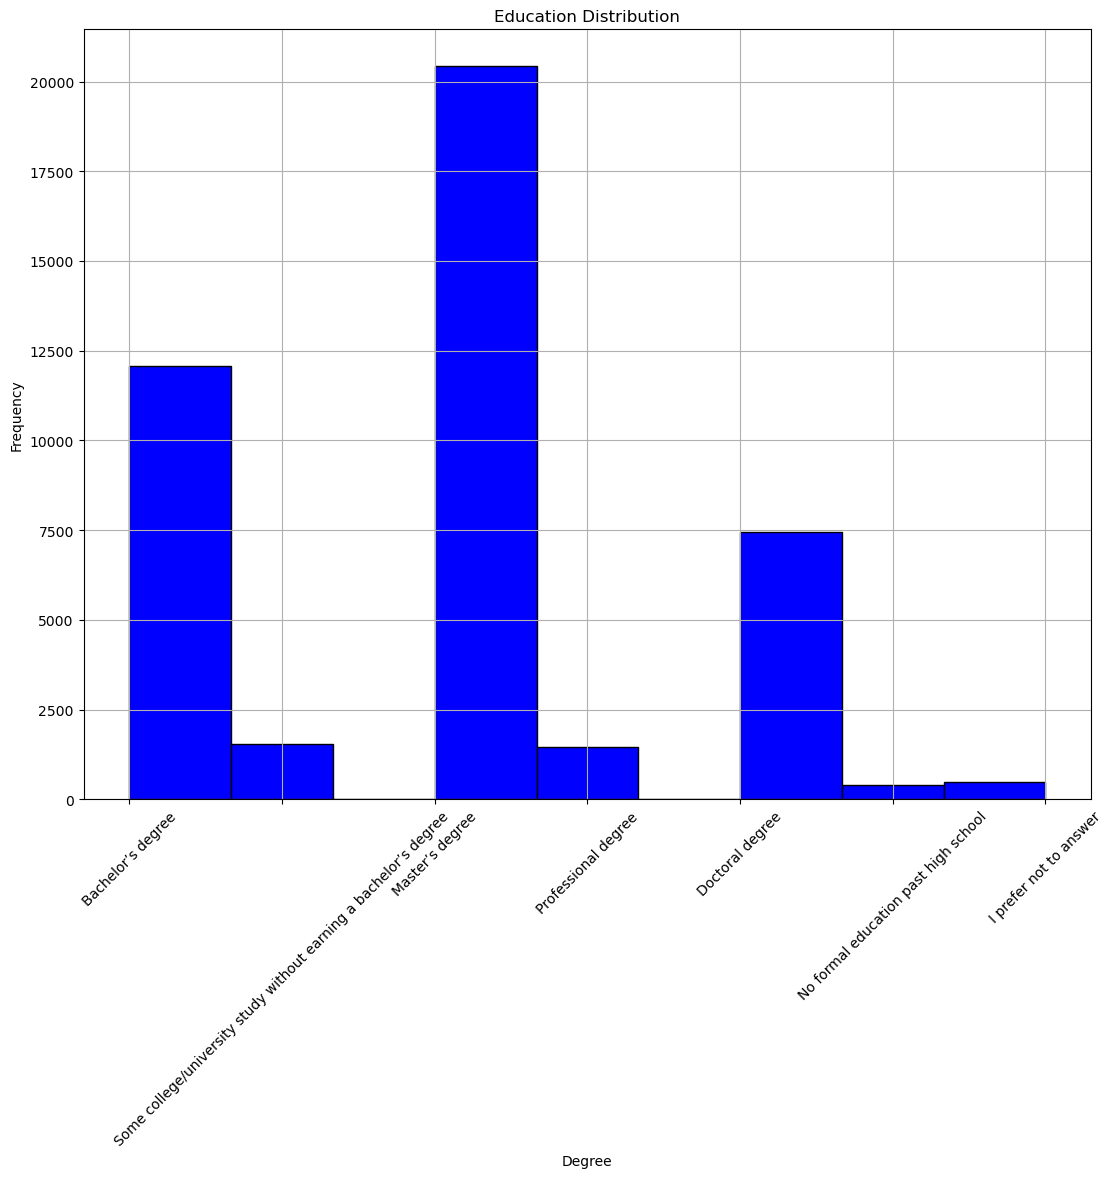

In [177]:
plt.figure(figsize = (13,10))
plt.hist(filtered_df["Degree"], bins=9, edgecolor='black', color='blue')
plt.title('Education Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

## Split by formal and non formal education

In [239]:
df_no_educ = filtered_df[filtered_df['Degree'] == 'Some college/university study without earning a bachelor’s degree']

In [240]:
df_educ = filtered_df[filtered_df['Degree'] != 'Some college/university study without earning a bachelor’s degree']

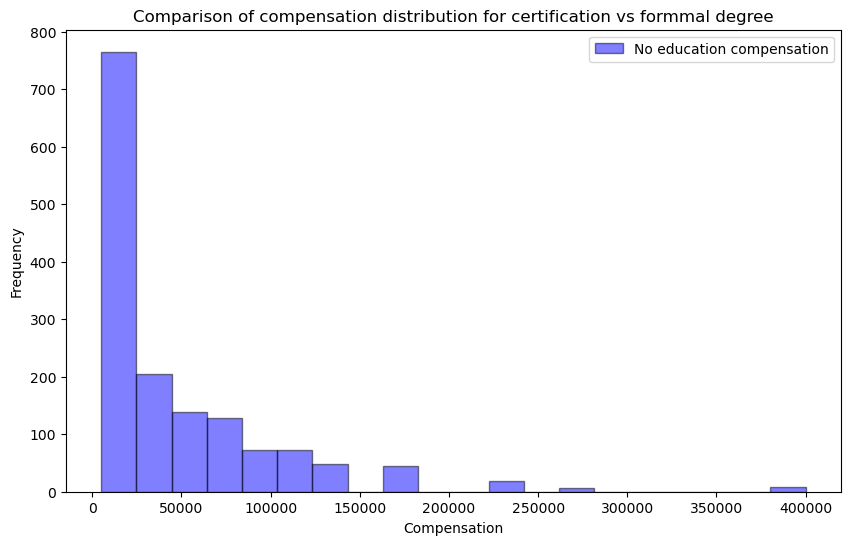

In [241]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_educ['Average Comp'], bins=20, alpha=0.5, label='No education compensation', color='blue', edgecolor='black')

plt.title("Comparison of compensation distribution for certification vs formmal degree")
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.legend()

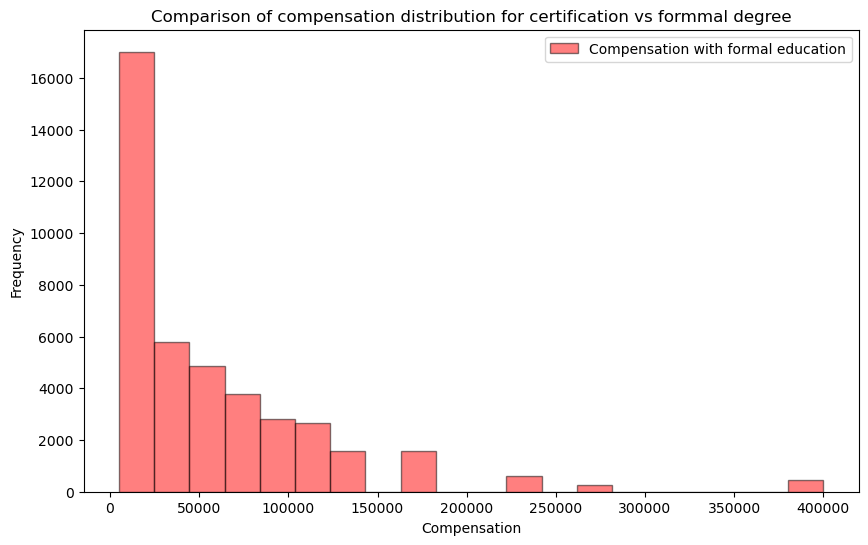

In [242]:
plt.figure(figsize=(10, 6))
plt.hist(df_educ['Average Comp'], bins=20, alpha=0.5, label='Compensation with formal education', color='red', edgecolor='black')
plt.title("Comparison of compensation distribution for certification vs formmal degree")
plt.xlabel('Compensation')
plt.ylabel('Frequency')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


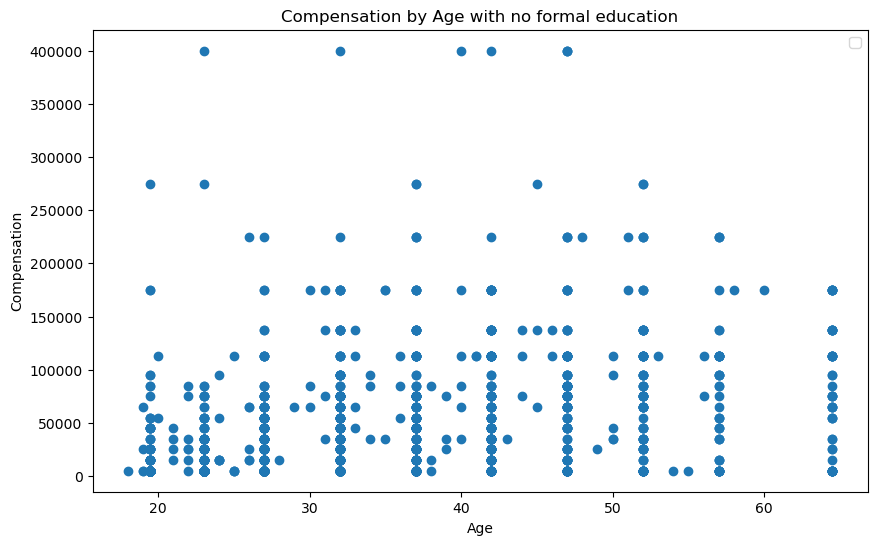

In [251]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_educ['Average Age'], df_no_educ['Average Comp'])
plt.title('Compensation by Age with no formal education')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


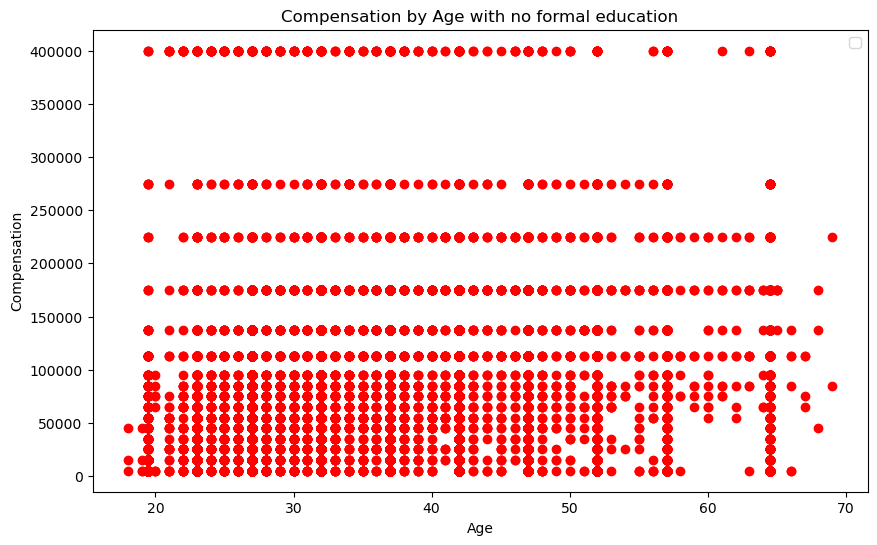

In [250]:
plt.figure(figsize=(10, 6))
plt.scatter(df_educ['Average Age'], df_educ['Average Comp'], color = 'red')
plt.title('Compensation by Age with formal education')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


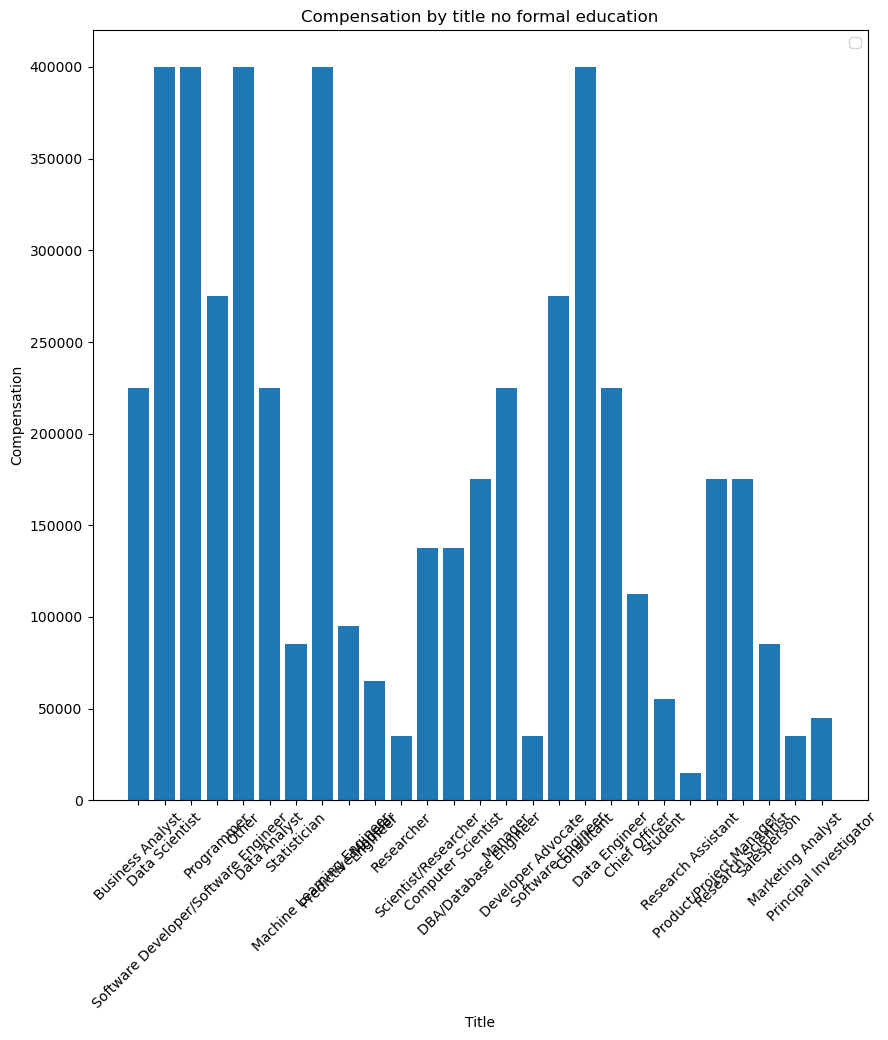

In [255]:
plt.figure(figsize=(10, 10))
plt.bar(df_no_educ['Job Title'], df_no_educ['Average Comp'])
plt.title('Compensation by title no formal education')
plt.xlabel('Title')
plt.ylabel('Compensation')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


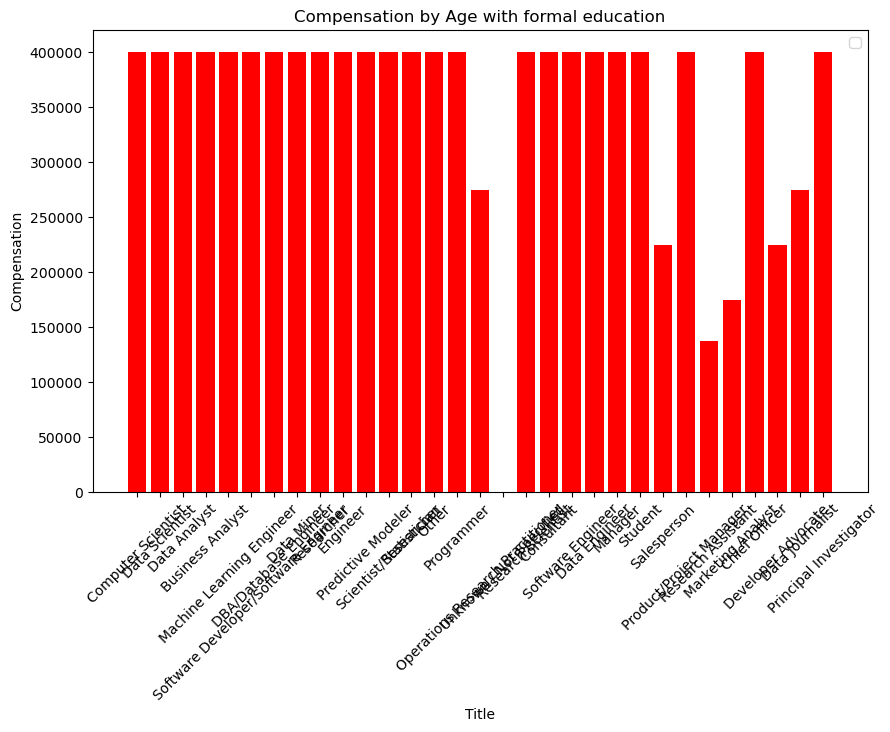

In [263]:
plt.figure(figsize=(10, 6))
plt.bar(df_educ['Job Title'], df_educ['Average Comp'], color = 'red')
plt.title('Compensation by Age with formal education')
plt.xlabel('Title')
plt.ylabel('Compensation')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


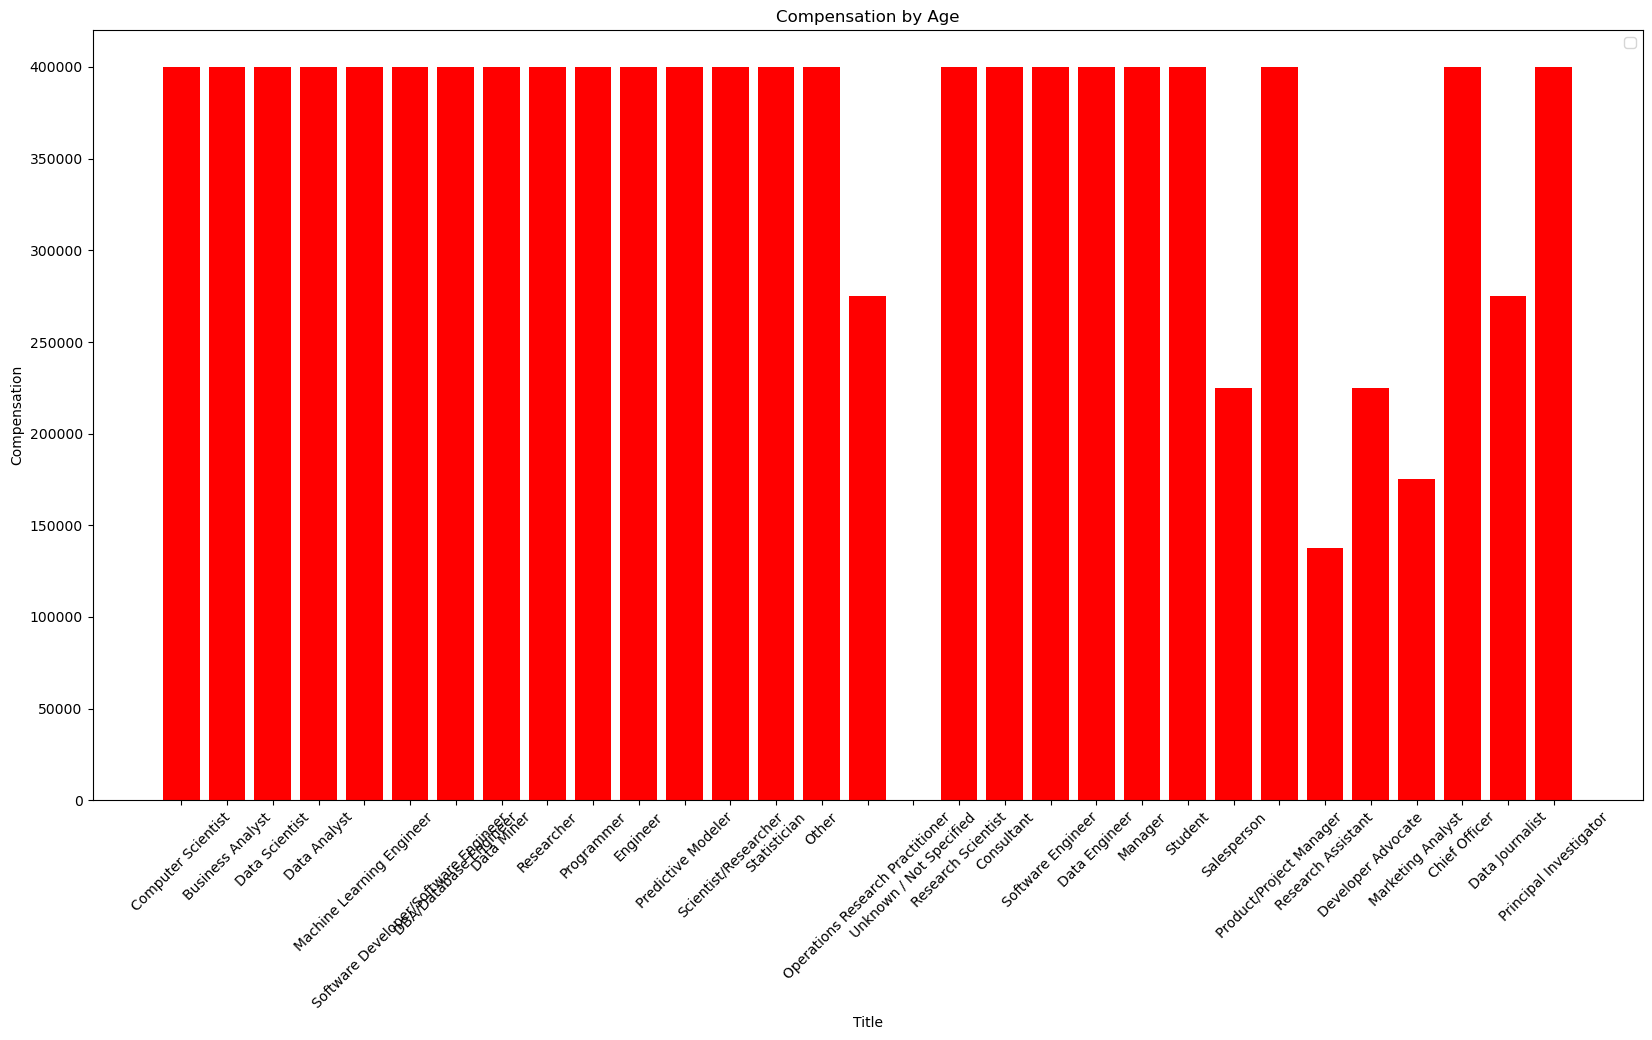

In [262]:
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['Job Title'], filtered_df['Average Comp'], color = 'red')
plt.title('Compensation by Age')
plt.xlabel('Title')
plt.ylabel('Compensation')
plt.legend()
plt.xticks(rotation = 45)
plt.show()